**Time Series EDA**

**What we do in this section**

*  Read the stock data using pandas_datareader module
*  Plot the various plots using matplotlib
*  Calculate moving average and Do the Time Resampling 

In [18]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr
from datetime import datetime

In [15]:
df_tesla = pd.read_csv('https://raw.githubusercontent.com/Hitesh12358/ARIMA_Model/main/TSLA.csv')

In [33]:
df_tesla.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-28,48.838001,50.200001,48.779999,49.998001,49.998001,30390500
1,2017-03-01,50.835999,50.970001,49.821999,50.004002,50.004002,24047500
2,2017-03-02,49.942001,50.655998,49.653999,50.096001,50.096001,16759000
3,2017-03-03,50.147999,50.380001,49.799999,50.313999,50.313999,14597000
4,2017-03-06,49.582001,50.340000,49.501999,50.242001,50.242001,16777500


In [29]:
# change the date as datetime variable
df_tesla['Date'] = pd.to_datetime(df_tesla.Date)


In [57]:
# checking all variable datatype
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-02-28 to 2022-02-25
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  1259 non-null   float64
 1   High                  1259 non-null   float64
 2   Low                   1259 non-null   float64
 3   Close                 1259 non-null   float64
 4   Adj Close             1259 non-null   float64
 5   Volume                1259 non-null   int64  
 6   Open:30 days rolling  1230 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.7 KB


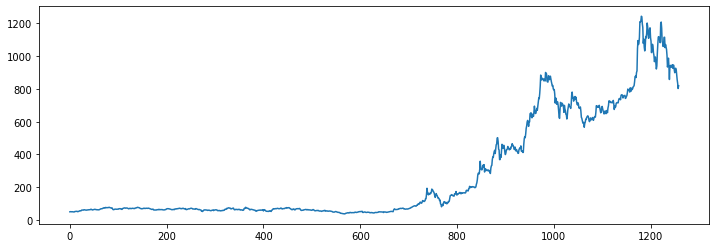

In [34]:
df_tesla['High'].plot(figsize=(12,4))

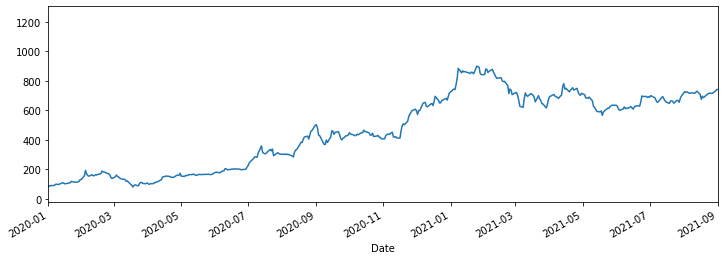

In [40]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

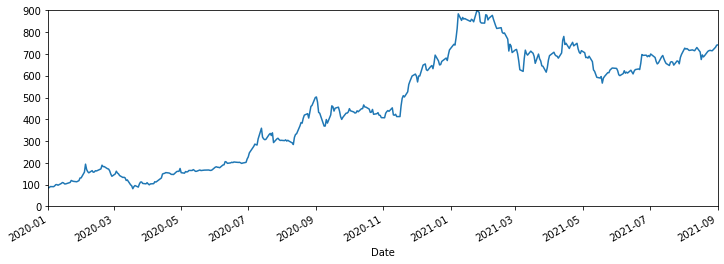

In [41]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

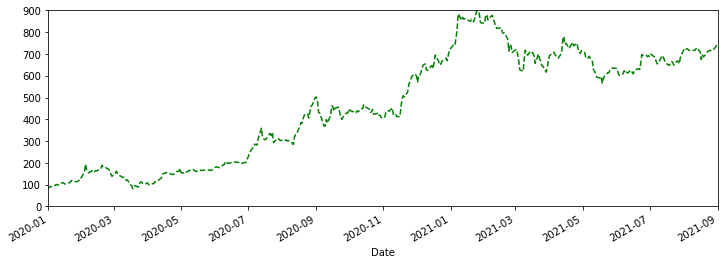

In [39]:
## xlimit and y limit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')



In [38]:
df_tesla=df_tesla.set_index('Date',drop=True)

 **Time Resampling** 

 * Time sampling is used to convert time series data values according daily, monthly or weekly timeframe.
 * For These we can have two options:
 1. downsampling: which resample the dataset to long range time frame, for instance daily to weekly, weekly to biweekly or monthly, for this option we can used sum(), mean(), max() fuction to calculate convestion.
 2. upsampling: As you would have guessed, this is completely opposite of downsampling.For example, monthly data to weekly/daily.
 As you wonder how is this possible? As Month have 30 samples and day is 1 sample, so here many empty or NaN values are created and to fill these cells we can use forward fill(pad()) or backward fill (bfill) method. 

* This would introduce noise in our dataset so according to our research question we should apply the sampling strategies.

* Let's Look at some examples.


In [43]:
df_tesla.resample(rule='A').min()



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,48.838001,49.299999,48.556000,48.737999,48.737999,14597000
2018-12-31,50.556000,52.066002,48.917999,50.112000,50.112000,15403500
2019-12-31,36.220001,37.335999,35.397999,35.793999,35.793999,12328000
2020-12-31,74.940002,80.972000,70.101997,72.244003,72.244003,17357700
2021-12-31,552.549988,566.210022,539.489990,563.000000,563.000000,9800600
2022-12-31,700.390015,802.479980,700.000000,764.039978,764.039978,16909700


In [44]:
df_tesla.resample(rule='A').max()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,77.337997,77.921997,75.870003,77.000000,77.000000,98957000
2018-12-31,75.000000,77.491997,73.424004,75.914001,75.914001,168248500
2019-12-31,87.000000,87.061996,85.269997,86.188004,86.188004,150030500
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,304694000
2021-12-31,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,89396500
2022-12-31,1189.550049,1208.000000,1136.040039,1199.780029,1199.780029,50521900


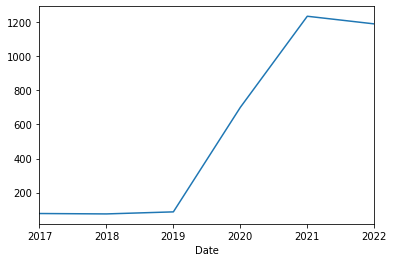

In [45]:
##year end frequency
df_tesla.resample(rule='A').max()['Open'].plot()

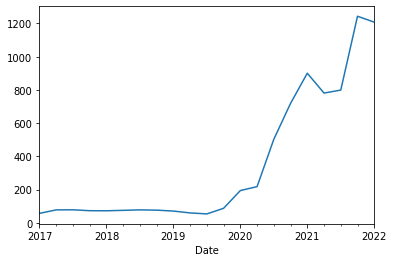

In [46]:
##quaterly start frequency
df_tesla.resample(rule='QS').max()['High'].plot()

In [47]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-29,77.337997,77.921997,75.870003,77.000000,77.000000,98957000
2018-12-31,75.000000,77.491997,73.424004,75.914001,75.914001,168248500
2019-12-31,87.000000,87.061996,85.269997,86.188004,86.188004,150030500
2020-12-31,699.989990,718.719971,691.119995,705.669983,705.669983,304694000
2021-12-31,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,89396500
2022-12-30,1189.550049,1208.000000,1136.040039,1199.780029,1199.780029,50521900


In [48]:
df_tesla.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,55.745998,56.400002,55.442001,55.660000,55.660000,39938000
2017-04-03,77.337997,77.398003,75.870003,76.690002,76.690002,86307000
2017-07-03,76.050003,77.921997,75.536003,77.000000,77.000000,96622500
2017-10-02,71.396004,72.599998,70.825996,71.930000,71.930000,98957000
2018-01-01,72.000000,72.099998,70.472000,71.484001,71.484001,105007000
2018-04-02,73.031998,74.746002,70.900002,74.166000,74.166000,111737000
2018-07-02,73.818001,77.491997,73.424004,75.914001,75.914001,168248500
2018-10-01,75.000000,75.898003,73.349998,75.358002,75.358002,137127500
2019-01-01,69.241997,70.400002,68.830002,69.461998,69.461998,120754000


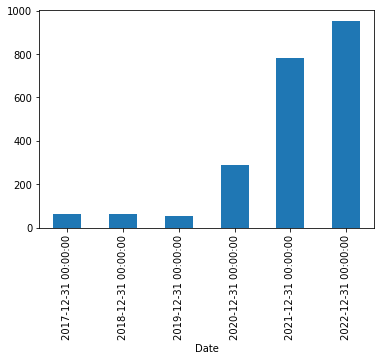

In [49]:
##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

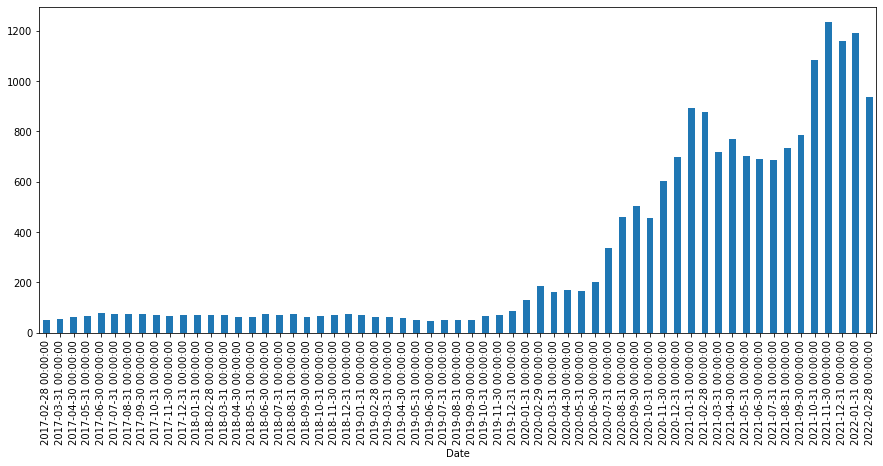

In [50]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [51]:
# apply max function on last 10 values and select maximum of them as next value(11th index).
df_tesla['High'].rolling(11).max().head(20)

Date
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10          NaN
2017-03-13          NaN
2017-03-14    51.624001
2017-03-15    52.200001
2017-03-16    53.150002
2017-03-17    53.150002
2017-03-20    53.150002
2017-03-21    53.150002
2017-03-22    53.150002
2017-03-23    53.150002
2017-03-24    53.150002
2017-03-27    54.113998
Name: High, dtype: float64

In [60]:
df_tesla.head(20)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2017-02-28,48.838001,50.200001,48.779999,49.998001,49.998001,30390500,NaN
2017-03-01,50.835999,50.970001,49.821999,50.004002,50.004002,24047500,NaN
2017-03-02,49.942001,50.655998,49.653999,50.096001,50.096001,16759000,NaN
2017-03-03,50.147999,50.380001,49.799999,50.313999,50.313999,14597000,NaN
2017-03-06,49.582001,50.340000,49.501999,50.242001,50.242001,16777500,NaN
2017-03-07,50.383999,50.778000,49.664001,49.717999,49.717999,17297500,NaN
2017-03-08,49.400002,50.014000,49.063999,49.374001,49.374001,18626000,NaN
2017-03-09,49.526001,49.731998,48.599998,48.980000,48.980000,19396500,NaN
2017-03-10,49.242001,49.299999,48.599998,48.737999,48.737999,15331500,NaN


In [53]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [56]:
df_tesla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2017-02-28,48.838001,50.200001,48.779999,49.998001,49.998001,30390500,NaN
2017-03-01,50.835999,50.970001,49.821999,50.004002,50.004002,24047500,NaN
2017-03-02,49.942001,50.655998,49.653999,50.096001,50.096001,16759000,NaN
2017-03-03,50.147999,50.380001,49.799999,50.313999,50.313999,14597000,NaN
2017-03-06,49.582001,50.340000,49.501999,50.242001,50.242001,16777500,NaN
2017-03-07,50.383999,50.778000,49.664001,49.717999,49.717999,17297500,NaN
2017-03-08,49.400002,50.014000,49.063999,49.374001,49.374001,18626000,NaN
2017-03-09,49.526001,49.731998,48.599998,48.980000,48.980000,19396500,NaN
2017-03-10,49.242001,49.299999,48.599998,48.737999,48.737999,15331500,NaN


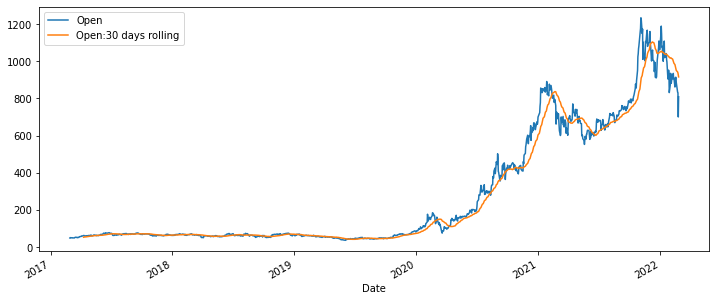

In [55]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))